In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns

In [46]:
df_orders = pd.read_csv('Orders.csv')
df_details = pd.read_csv('Details.csv')

In [47]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 19.7+ KB


In [48]:
df_orders.head()

,Order ID,Order Date,CustomerName,State,City
0,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura
1,B-25993,03-02-2018,Madhav,Delhi,Delhi
2,B-25973,24-01-2018,Madan Mohan,Uttar Pradesh,Mathura
3,B-25923,27-12-2018,Gopal,Maharashtra,Mumbai
4,B-25757,21-08-2018,Vishakha,Madhya Pradesh,Indore


In [49]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1500 non-null   object
 1   Amount        1500 non-null   int64 
 2   Profit        1500 non-null   int64 
 3   Quantity      1500 non-null   int64 
 4   Category      1500 non-null   object
 5   Sub-Category  1500 non-null   object
 6   PaymentMode   1500 non-null   object
dtypes: int64(3), object(4)
memory usage: 82.2+ KB


In [50]:
df_details.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI
2,B-25955,2927,146,8,Furniture,Bookcases,EMI
3,B-26093,2847,712,8,Electronics,Printers,Credit Card
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card


In [51]:
print("Total Records in Orders.csv:", df_orders.shape[0])
print("Total Records in Details.csv:", df_details.shape[0])


Total Records in Orders.csv: 500
Total Records in Details.csv: 1500


In [52]:
df_orders.isnull().sum()

Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
dtype: int64

In [53]:
df_details.isnull().sum()

Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
dtype: int64

In [54]:
df_orders.duplicated().sum()

0

In [55]:
df_details.duplicated().sum()

0

In [56]:
print(df_orders.shape) 

(500, 5)


In [57]:
print(df_details.shape) 

(1500, 7)


In [58]:
df = pd.merge(df_details, df_orders, on='Order ID', how = 'inner')
df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City
0,B-25681,1096,658,7,Electronics,Electronic Games,COD,04-06-2018,Bhawna,Madhya Pradesh,Indore
1,B-25681,1625,-77,3,Electronics,Phones,EMI,04-06-2018,Bhawna,Madhya Pradesh,Indore
2,B-25681,523,204,7,Clothing,Trousers,COD,04-06-2018,Bhawna,Madhya Pradesh,Indore
3,B-25681,44,-3,1,Clothing,Saree,Debit Card,04-06-2018,Bhawna,Madhya Pradesh,Indore
4,B-25681,243,-14,2,Furniture,Chairs,COD,04-06-2018,Bhawna,Madhya Pradesh,Indore


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1500 non-null   object
 1   Amount        1500 non-null   int64 
 2   Profit        1500 non-null   int64 
 3   Quantity      1500 non-null   int64 
 4   Category      1500 non-null   object
 5   Sub-Category  1500 non-null   object
 6   PaymentMode   1500 non-null   object
 7   Order Date    1500 non-null   object
 8   CustomerName  1500 non-null   object
 9   State         1500 non-null   object
 10  City          1500 non-null   object
dtypes: int64(3), object(8)
memory usage: 140.6+ KB


In [60]:
df.duplicated().sum()

0

In [61]:
df.isnull().sum()

Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
Order Date      0
CustomerName    0
State           0
City            0
dtype: int64

In [62]:
print(df.describe())

print(df.nunique())

print(df.isnull().sum())


            Amount      Profit     Quantity
count  1500.000000  1500.00000  1500.000000
mean    291.847333    24.64200     3.743333
std     461.924620   168.55881     2.184942
min       4.000000 -1981.00000     1.000000
25%      47.750000   -12.00000     2.000000
50%     122.000000     8.00000     3.000000
75%     326.250000    38.00000     5.000000
max    5729.000000  1864.00000    14.000000
Order ID        500
Amount          590
Profit          406
Quantity         14
Category          3
Sub-Category     17
PaymentMode       5
Order Date      307
CustomerName    336
State            19
City             25
dtype: int64
Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
Order Date      0
CustomerName    0
State           0
City            0
dtype: int64


In [63]:
df.describe(exclude = np.number)

,Order ID,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City
count,1500,1500,1500,1500,1500,1500,1500,1500
unique,500,3,17,5,307,336,19,25
top,B-26056,Clothing,Saree,COD,10-03-2018,Abhishek,Madhya Pradesh,Indore
freq,12,949,211,684,33,21,314,248


## Visualization

Total Sales by Category

In [64]:
#Count total sales by category
sales_by_category = df.groupby('Category')['Amount'].sum().sort_values(ascending = False)
sales_by_category

Category
Electronics    166267
Clothing       144323
Furniture      127181
Name: Amount, dtype: int64

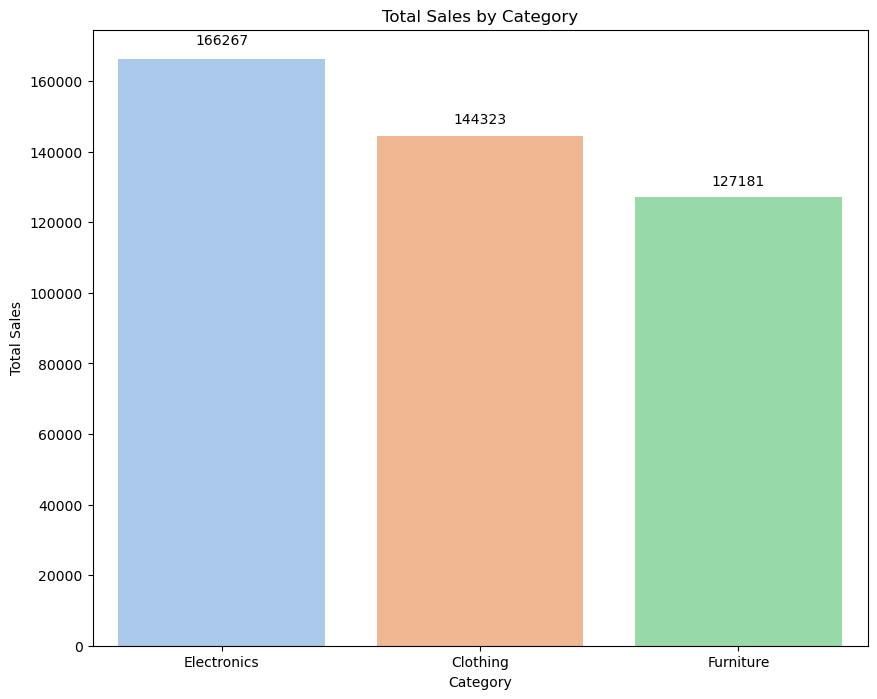

In [65]:
#Plot Bar Chart
plt.figure(figsize = (10, 8))
sns.barplot(x = sales_by_category.index, y = sales_by_category.values,
            palette = 'pastel')
# Add annotations
for i, value in enumerate(sales_by_category.values):
    plt.text(i, value + 0.02 * value, f'{value:.0f}',
              ha='center', va='bottom', fontsize=10)

#Add tittle and labels
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

Profit by Sub-Category

In [66]:
#Count total profit by sub-category
profit_by_sub_category = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending = False)
profit_by_sub_category

Sub-Category
Printers            8606
Bookcases           6516
Saree               4057
Accessories         3353
Tables              3139
Trousers            2847
Stole               2431
Phones              1847
Hankerchief         1823
Chairs              1627
Shirt               1513
T-shirt             1500
Leggings            -130
Skirt               -315
Kurti               -401
Electronic Games    -644
Furnishings         -806
Name: Profit, dtype: int64

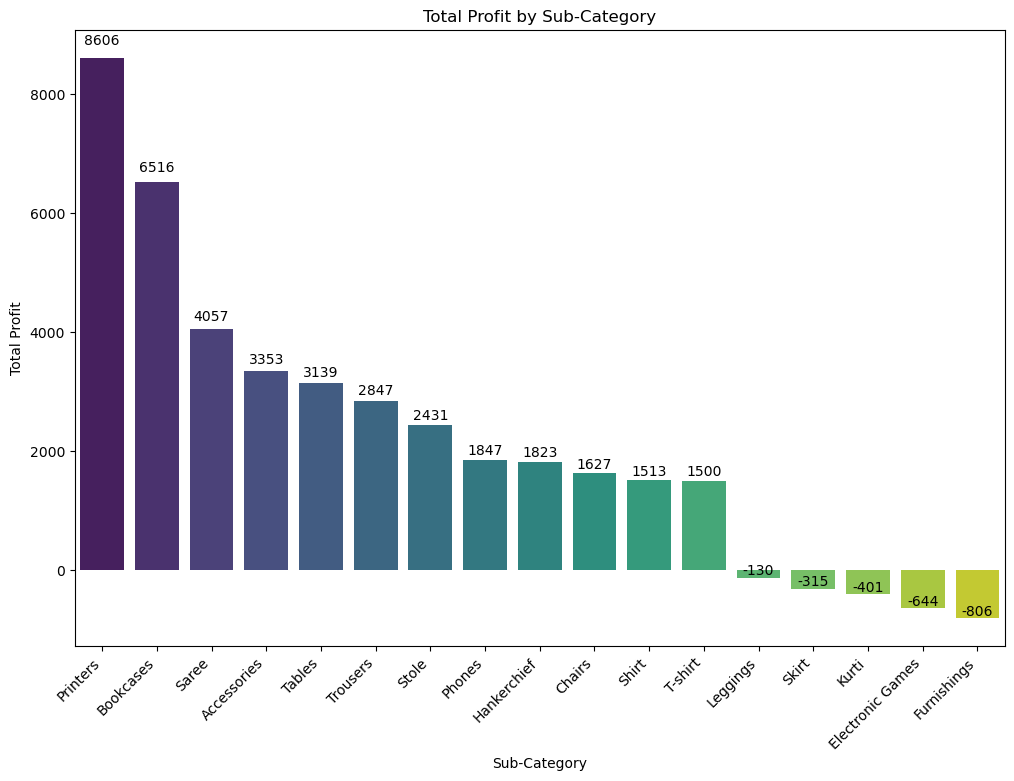

In [67]:
#Plot Bar Chart
plt.figure(figsize = (12, 8))
sns.barplot(x = profit_by_sub_category.index, y = profit_by_sub_category.values, 
            palette = 'viridis')

# Add annotations
for i, value in enumerate(profit_by_sub_category.values):
    plt.text(i, value + 0.02 * value, f'{value:.0f}',
              ha='center', va='bottom', fontsize=10)

#Add title and label
plt.title('Total Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation = 45, ha = 'right')

plt.show()

Sales Trend Over Time

c:\Users\DELL\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\DELL\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27-03-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\DELL\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '25-11-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\DELL\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21-06-2018' in DD/MM/YYYY format. Provide format or specify in

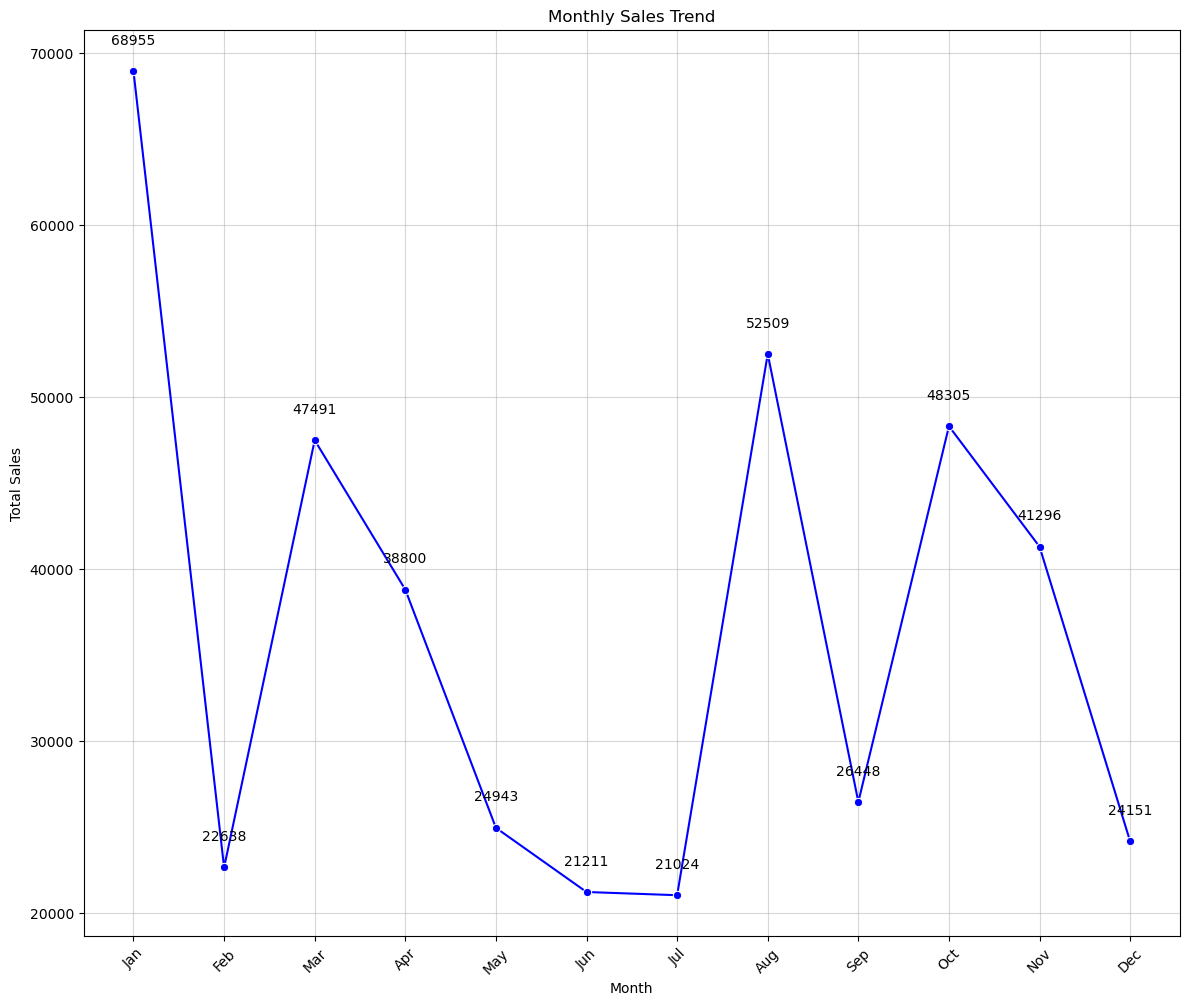

In [68]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

df['Month'] = df['Order Date'].dt.to_period('M')

monthly_sales = df.groupby('Month')['Amount'].sum()
monthly_sales.index = monthly_sales.index.strftime('%b') 

plt.figure(figsize = (12, 10))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values,
              marker='o', color='b')

for x, y in zip(monthly_sales.index.astype(str), monthly_sales.values):
    plt.text(x, y + 0.02 * max(monthly_sales.values), f'{y:.0f}', ha='center', va='bottom', fontsize=10)


plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(alpha = 0.5)
plt.tight_layout()
plt.xticks(rotation=45)

plt.show()

Popular Payment Methods

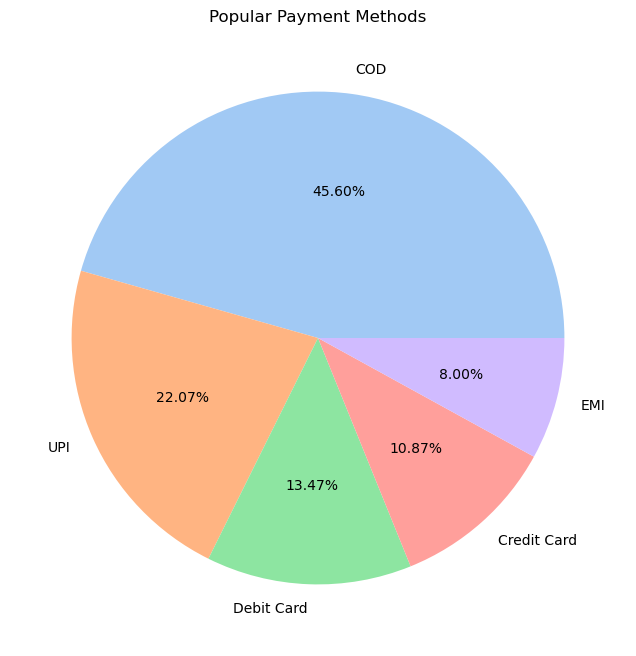

In [69]:
payment_mode_count = df['PaymentMode'].value_counts()

#Plot pie chart
plt.figure(figsize=(8, 8))
payment_mode_count.plot(kind = 'pie', autopct = '%1.2f%%',
                         colors = sns.color_palette('pastel'))
plt.title('Popular Payment Methods')
plt.ylabel('')
plt.show()


Sales by Location (State or City)

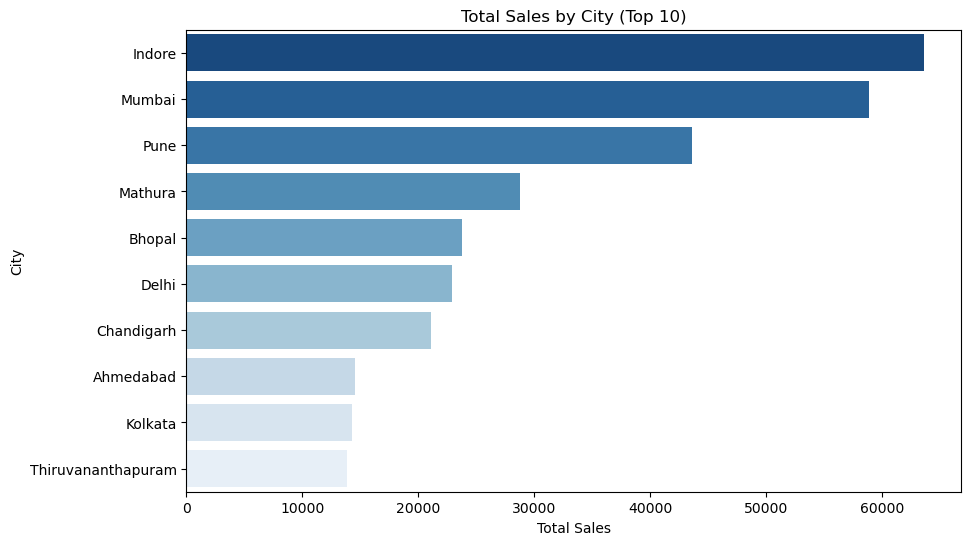

In [70]:
#Calculate total sales by city
sales_by_city = df.groupby('City')['Amount'].sum().sort_values(ascending= False).head(10)

plt.figure(figsize = (10, 6))
sns.barplot(x = sales_by_city.values, y = sales_by_city.index, palette = 'Blues_r')
plt.title('Total Sales by City (Top 10)')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.show()

Profit by State

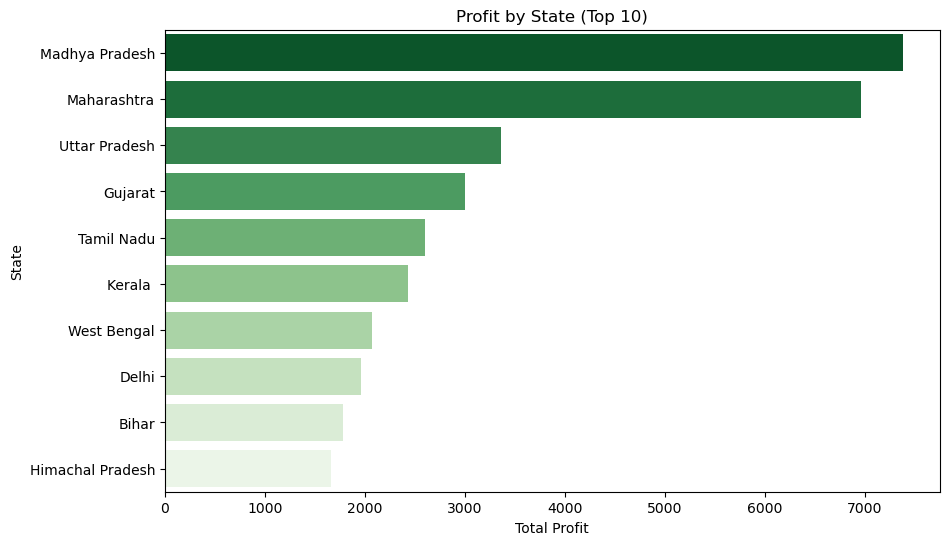

In [71]:
profit_by_state = df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(10)

#Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x = profit_by_state.values, y = profit_by_state.index, palette = 'Greens_r')
plt.title('Profit by State (Top 10)')
plt.xlabel('Total Profit')
plt.ylabel('State')
plt.show()

Scatter Plot-Sales (Amount) vs Profit

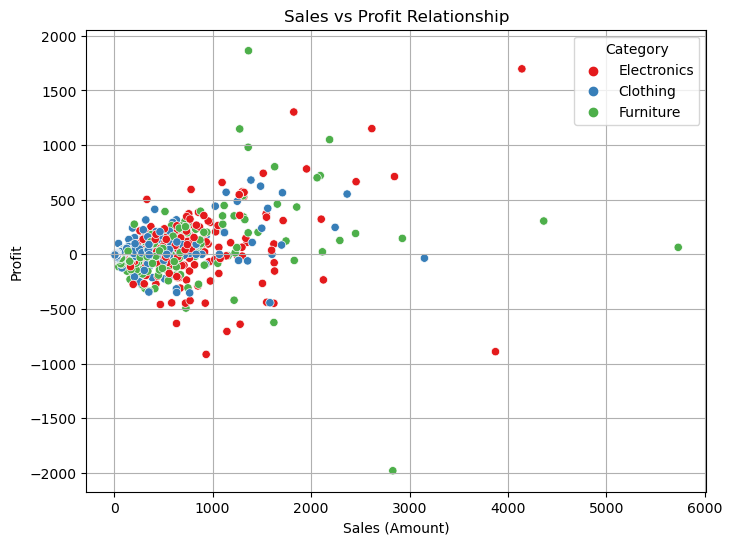

In [72]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = 'Amount', y = 'Profit', data = df, hue = 'Category', palette = 'Set1')
plt.title('Sales vs Profit Relationship')
plt.xlabel('Sales (Amount)')
plt.ylabel('Profit')
plt.legend(title = 'Category')
plt.grid()
plt.show()

Profit by Payment Menthods

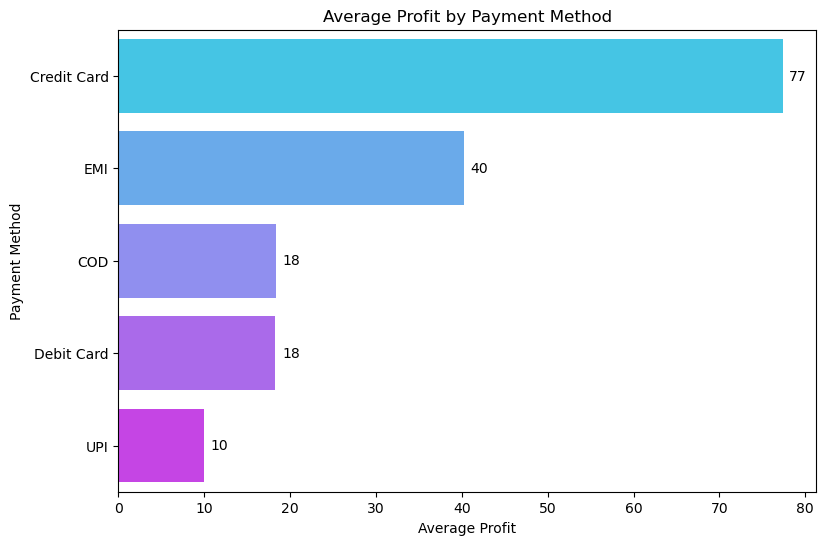

In [73]:
avg_profit_by_payment = df.groupby('PaymentMode')['Profit'].mean().sort_values(ascending=False)

plt.figure(figsize=(9, 6))
sns.barplot(x = avg_profit_by_payment.values, y = avg_profit_by_payment.index, palette = 'cool')

# Add annotations
for i, value in enumerate(avg_profit_by_payment.values):
    plt.text(value + 0.01 * max(avg_profit_by_payment.values),
             i,
             f'{value:.0f}',
             ha = 'left',
             va = 'center',
             fontsize=10)
    
plt.title('Average Profit by Payment Method')
plt.xlabel('Average Profit')
plt.ylabel('Payment Method')
plt.show()

## K-Means Analysis

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

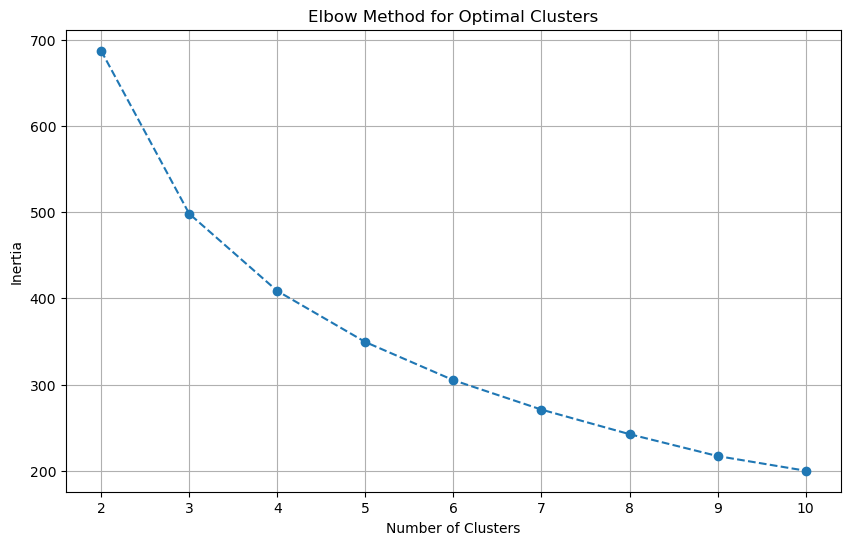

In [74]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

#Count customer metric
customer_metrics = df.groupby('CustomerName').agg({
    'Amount' : 'sum',
    'Profit' : 'sum',
    'Order ID' :'count',
    'Quantity' : 'sum'
}).reset_index()

#Standardized Data
scaler = StandardScaler()
scaled_metrics = scaler.fit_transform(customer_metrics[['Amount', 'Profit', 'Order ID','Quantity']])

inertia = []
silhouette_avg = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    kmeans =KMeans(n_clusters= n_clusters, random_state= 42)
    kmeans.fit(scaled_metrics)
    inertia.append(kmeans.inertia_)
    silhouette_avg.append(silhouette_score(scaled_metrics, kmeans.labels_))

plt.figure(figsize = (10, 6))
plt.plot(range_n_clusters, inertia, marker = 'o', linestyle = '--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range_n_clusters)
plt.grid()
plt.show()

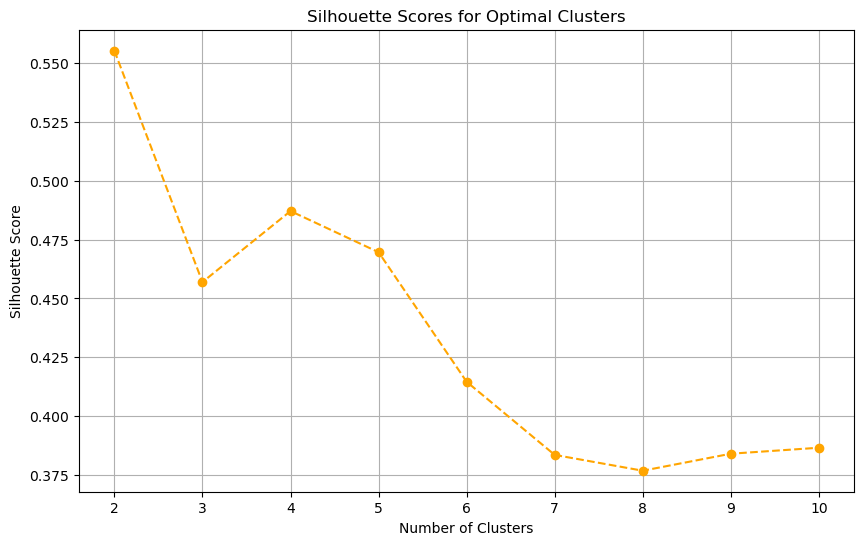

In [75]:
#Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg, marker='o', linestyle='--', color='orange')
plt.title('Silhouette Scores for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid()
plt.show()

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


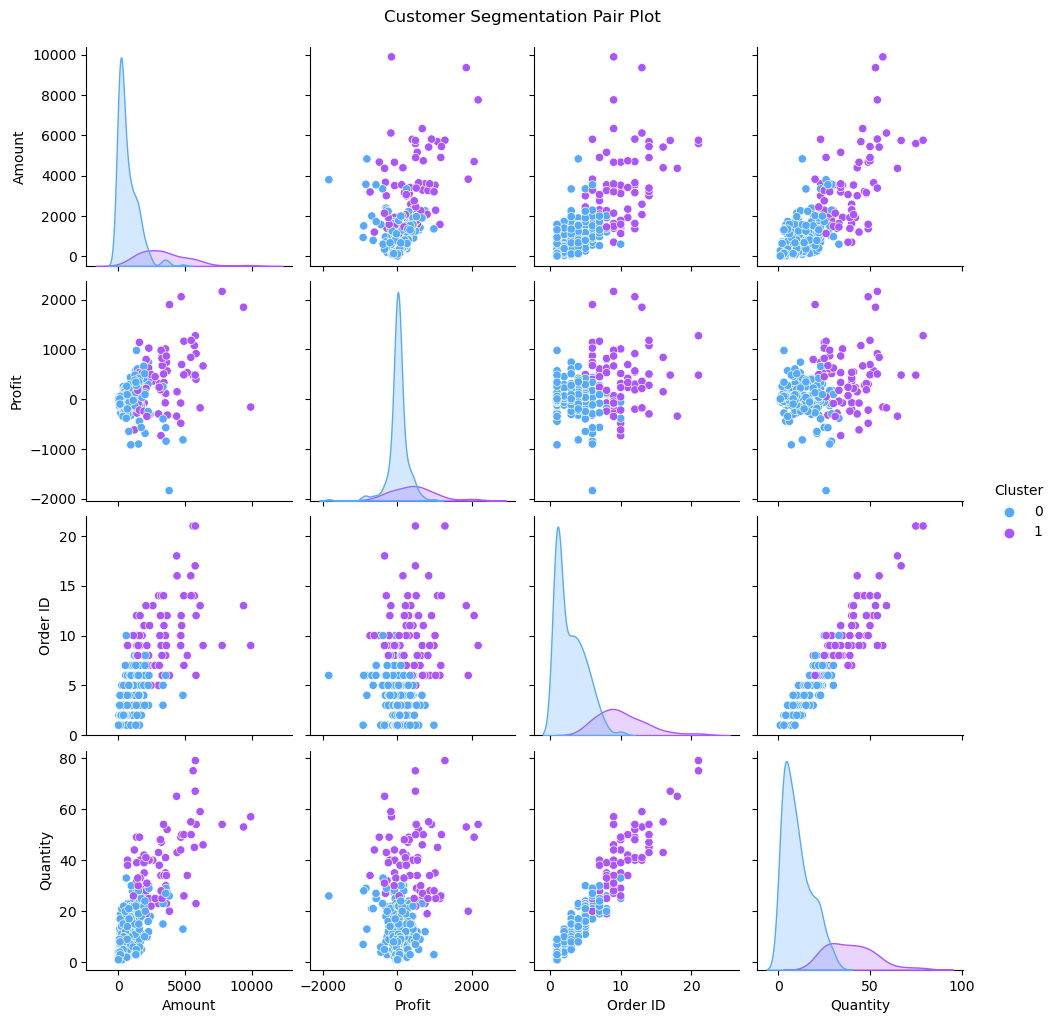

In [129]:
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_metrics['Cluster'] = kmeans.fit_predict(scaled_metrics)


# Pair plot untuk visualisasi distribusi semua metrik berdasarkan cluster
sns.pairplot(customer_metrics, hue='Cluster', palette='cool', diag_kind='kde')
plt.suptitle("Customer Segmentation Pair Plot", y=1.02)
plt.show()



In [130]:
# Average metrics per cluster
cluster_summary = customer_metrics.groupby('Cluster').agg({
    'Amount': 'mean',
    'Profit': 'mean',
    'Order ID': 'mean',
    'Quantity': 'mean'
}).reset_index()

print(cluster_summary)


   Cluster       Amount      Profit   Order ID   Quantity
0        0   697.442748   17.622137   2.862595  10.335878
1        1  3446.500000  437.108108  10.135135  39.283784


## Recency, Frequency, Monetary (RFM) Analysis

In [105]:
import datetime as dt # Import the datetime module for date manipulation

# Set the reference date as one day after the latest order date. 
# Adding one day ensures Recency values are non-zero.
reference_date = df['Order Date'].max() + dt.timedelta(days = 1)


rfm = df.groupby('CustomerName').agg({
    # Calculate Recency: Days since the last purchase for each customer
    'Order Date' : lambda x: (reference_date - x.max()).days,
    # Calculate Frequency: Total number of orders made by each customer
    'Order ID': 'count',
    # Calculate Monetary: Total amount spent by each customer
    'Amount': 'sum'
}).reset_index()

# Rename the columns for better readability
rfm.columns = ['CustomerName', 'Recency', 'Frequency', 'Monetary']

# Add RFM Scores
# Divide Recency into 4 bins and assign labels (4 = best, 1 = worst)
# Note: A smaller Recency value (more recent purchase) is better, so higher scores are assigned to smaller values.
rfm['R_Score'] = pd.cut(rfm['Recency'], bins=4, labels=[4, 3, 2, 1])

# Divide Frequency into 4 bins and assign labels (1 = worst, 4 = best)
# Note: A higher Frequency value (more frequent purchases) is better, so higher scores are assigned to larger values.
rfm['F_Score'] = pd.cut(rfm['Frequency'], bins=4, labels=[1, 2, 3, 4])

# Divide Monetary into 4 bins and assign labels (1 = worst, 4 = best)
# Note: A higher Monetary value (greater spending) is better, so higher scores are assigned to larger values.
rfm['M_Score'] = pd.cut(rfm['Monetary'], bins=4, labels=[1, 2, 3, 4])

# Concatenate R, F, and M scores to form the RFM Score
rfm['RFM_Score'] = (
    rfm['R_Score'].astype(str) +
    rfm['F_Score'].astype(str) +
    rfm['M_Score'].astype(str)
)

# Classify customers into segments based on RFM Score
def classify_segment(row):
    r_score, f_score, m_score = int(row['R_Score']), int(row['F_Score']), int(row['M_Score'])
    
    if r_score == 4 and f_score >= 3 and m_score >= 3:
        return 'Loyal'
    elif r_score >= 3 and f_score >= 2:
        return 'Potential'
    elif r_score <= 2 and (f_score >= 2 or m_score >= 2):
        return 'At Risk'
    else:
        return 'Lost'

rfm['Segment'] = rfm.apply(classify_segment, axis=1)

# Display the first few rows of the RFM table
rfm


,CustomerName,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,Aakanksha,359,2,74,1,1,1,111,Lost
1,Aarushi,150,12,4701,3,3,2,332,Potential
2,Aastha,67,6,3276,4,1,2,412,Lost
3,Aayush,47,6,556,4,1,1,411,Lost
4,Aayushi,108,5,689,3,1,1,311,Lost
...,...,...,...,...,...,...,...,...,...
331,Wale,167,4,130,3,1,1,311,Lost
332,Yaanvi,361,4,675,1,1,1,111,Lost
333,Yash,236,5,789,2,1,1,211,Lost
334,Yogesh,119,16,5421,3,3,3,333,Potential


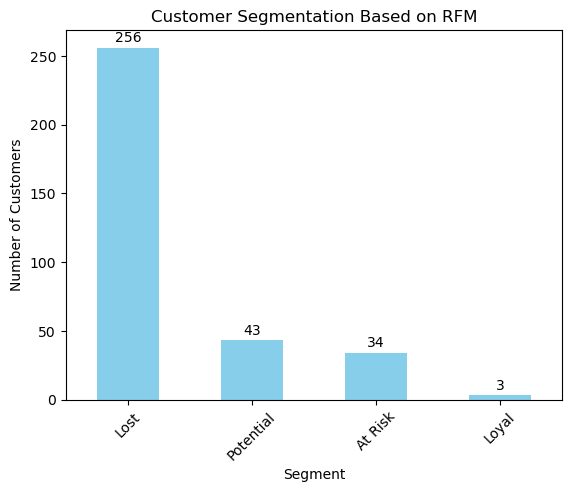

In [122]:
# Segment Visualization
rfm['Segment'].value_counts().plot(kind='bar', color='skyblue')

plt.title('Customer Segmentation Based on RFM')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

for p in plt.gca().patches:  # Loop through each bar (patch) in the chart
    plt.text(
        p.get_x() + p.get_width() / 2,  # Position the text at the center of the bar
        p.get_height() + 2,  # Place the text slightly above the top of the bar
        int(p.get_height()),  # Convert the height of the bar (count) to an integer and display it as text
        ha='center',  # Horizontally align the text to the center
        va='bottom'  # Vertically align the text to the bottom of the text box
    )

plt.show()

Validating the RFM Table

In [123]:
customer_name = "Aakanksha"  # Example of one customer
last_order_date = df[df['CustomerName'] == customer_name]['Order Date'].max()
recency_calculated = (reference_date - last_order_date).days

print("Customer:", customer_name)
print("Last Order Date:", last_order_date)
print("Recency (Calculated):", recency_calculated)


Customer: Aakanksha
Last Order Date: 2018-01-07 00:00:00
Recency (Calculated): 359


In [ ]:
rfm_recency = rfm[rfm['CustomerName'] == customer_name]['Recency'].values[0]
print("Recency in RFM Table:", rfm_recency)

# Validation
print("Is Recency Valid?:", recency_calculated == rfm_recency)


Recency in RFM Table: 359
Is Recency Valid?: True


Average for the Recency, Frequency, and Monetary Metrics

In [110]:
segment_analysis = rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerName': 'count'
}).rename(columns={'CustomerName': 'Number of Customers'})

print(segment_analysis)


              Recency  Frequency     Monetary  Number of Customers
Segment                                                           
At Risk    264.823529   8.794118  2695.294118                   34
Lost       165.000000   2.703125   737.238281                  256
Loyal       47.333333  17.333333  5734.333333                    3
Potential  104.953488  10.627907  3260.348837                   43


Correlation between RFM Scores

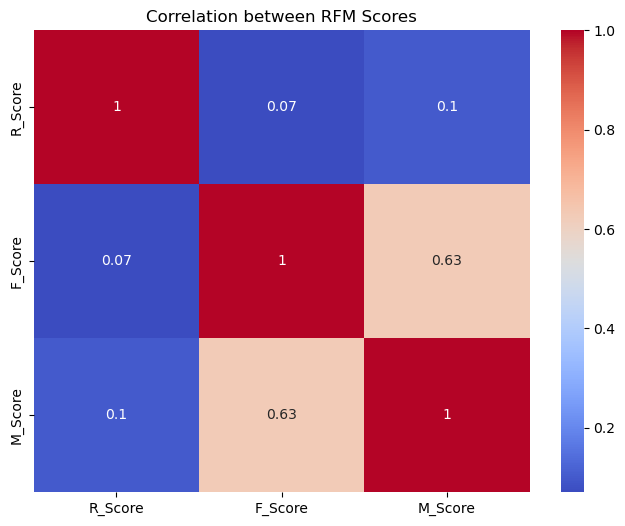

In [131]:
plt.figure(figsize=(8, 6))
sns.heatmap(rfm[['R_Score', 'F_Score', 'M_Score']].astype(int).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between RFM Scores')
plt.show()